### Кондратьев Михаил (ДЗ 4) ###

Использую цикл для создания эффективного фронта, вычисляя минимальную волатильность для различных целевых значений доходности. Каждая точка на красной пунктирной линии представляет оптимизированный портфель для этой целевой доходности. Также на графике отражены индивидуальные активы.

### График эффективного фронта и компаний

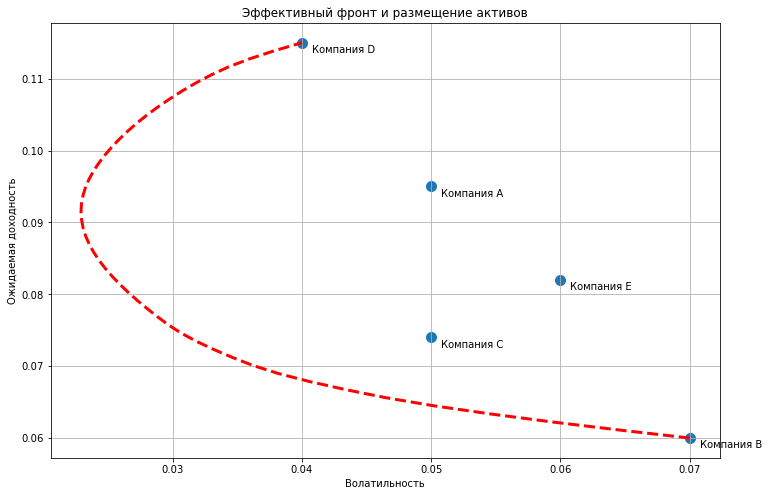

In [9]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Функции для расчета волатильности и доходности портфеля
def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def portfolio_return(weights, returns):
    return np.dot(weights, returns)

# Инициализация данных
data = {
    'Компания': ['Компания A', 'Компания B', 'Компания C', 'Компания D', 'Компания E'],
    'Ожидаемая доходность': [0.095, 0.06, 0.074, 0.115, 0.082],
    'Волатильность': [0.05, 0.07, 0.05, 0.04, 0.06]
}

df = pd.DataFrame(data)
df.index = df['Компания']

returns = df['Ожидаемая доходность'].values
volatility = df['Волатильность'].values
cov_matrix = np.diag(volatility*volatility)

num_assets = len(df)

# Функция для оптимизации портфеля с ограничениями
def optimize_portfolio(weights, returns, cov_matrix, return_target):
    args = (cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x, returns) - return_target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = minimize(portfolio_volatility, weights, args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Вывод эффективного фронта
eff_frontier_x, eff_frontier_y = [], []
for target in np.linspace(returns.min(), returns.max(), num=50):
    weights = num_assets * [1 / num_assets,]
    result = optimize_portfolio(weights, returns, cov_matrix, target)
    eff_frontier_x.append(result.fun)
    eff_frontier_y.append(target)

# График эффективного фронта и компаний
plt.figure(figsize=(12,8))
plt.scatter(volatility, returns, marker='o', s=100)
for i, txt in enumerate(df['Компания']):
    plt.annotate(txt, (volatility[i], returns[i]), xytext=(10,-10), textcoords='offset points')
plt.plot(eff_frontier_x, eff_frontier_y, 'r--', linewidth=3)
plt.title('Эффективный фронт и размещение активов')
plt.xlabel('Волатильность')
plt.ylabel('Ожидаемая доходность')
plt.grid(True)
plt.show()

### Расчёт коэффициента Шарпа

In [10]:
# Предполагаемая безрисковая ставка
risk_free_rate = 0.02

# Расчет коэффициента Шарпа
df['Коэффициент Шарпа'] = (df['Ожидаемая доходность'] - risk_free_rate) / df['Волатильность']

df.drop('Компания', axis=1, inplace=True)

# Вывод таблицы с результатами
print(df.to_string())

            Ожидаемая доходность  Волатильность  Коэффициент Шарпа
Компания                                                          
Компания A                 0.095           0.05           1.500000
Компания B                 0.060           0.07           0.571429
Компания C                 0.074           0.05           1.080000
Компания D                 0.115           0.04           2.375000
Компания E                 0.082           0.06           1.033333
